In [34]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from urllib.parse import urlparse
from wordcloud import WordCloud

In [2]:
# Load and display data
df = pd.read_csv("py_demo_client_extension_30_20250221075805.csv", skiprows = 5)
df

,OrgId,ParticipantId,DeviceId,url,eventtimeutc,transition,title,visitId,referringVisitId,eventtime
0,py_demo_client,demo,2nwjevbvxzm7ehb254,chrome-extension://hkmmnfimlpcphpgnmgdecpdpaef...,2025-02-21T07:58:02.688Z,link,NaN,166328,0,2025-02-20T23:58:02-08:00
1,py_demo_client,demo,2nwjevbvxzm7ehb254,https://chromewebstore.google.com/detail/snaps...,2025-02-21T07:57:51.308Z,link,Snapshot - Chrome Web Store,166327,166326,2025-02-20T23:57:51-08:00
2,py_demo_client,demo,2nwjevbvxzm7ehb254,https://py-insights.com/account/demo/product?s...,2025-02-21T07:57:40.972Z,link,PY Insights | Product,166319,0,2025-02-20T23:57:40-08:00
3,py_demo_client,demo,2nwjevbvxzm7ehb254,https://py-insights.com/account/demo/product?s...,2025-02-21T07:57:40.988Z,link,PY Insights | Product,166321,0,2025-02-20T23:57:40-08:00
4,py_demo_client,demo,2nwjevbvxzm7ehb254,https://py-insights.com/account/demo/product,2025-02-21T07:57:38.017Z,link,PY Insights | Product,166318,0,2025-02-20T23:57:38-08:00
...,...,...,...,...,...,...,...,...,...,...
5099,py_demo_client,demo,2nwjevbvxzm7ehb254,https://accounts.britishairways.com/security/c...,2025-01-21T11:01:22.350Z,typed,Error,160220,0,2025-01-21T03:01:22-08:00
5100,py_demo_client,demo,2nwjevbvxzm7ehb254,https://accounts.britishairways.com/u/login?st...,2025-01-21T11:00:39.407Z,link,British Airways log in,160213,160212,2025-01-21T03:00:39-08:00
5101,py_demo_client,demo,2nwjevbvxzm7ehb254,https://www.avios.com/manage-avios/move-and-co...,2025-01-21T11:00:37.059Z,link,Convert Avios: Nectar &#44; Finnair Plus &#44...,160211,0,2025-01-21T03:00:37-08:00
5102,py_demo_client,demo,2nwjevbvxzm7ehb254,https://www.avios.com/manage-avios/move-and-co...,2025-01-21T11:00:35.229Z,typed,Convert Avios: Nectar &#44; Finnair Plus &#44...,160209,0,2025-01-21T03:00:35-08:00


In [4]:
# View number of rows and columns
df.shape

(5104, 10)

In [5]:
# View available columns in data
print("Number of columns:", len(df.columns))
print("Column names:", df.columns.tolist())

Number of columns: 10
Column names: ['OrgId', 'ParticipantId', 'DeviceId', 'url', 'eventtimeutc', 'transition', 'title', 'visitId', 'referringVisitId', 'eventtime']


In [6]:
# View data types
df.dtypes

,0
OrgId,object
ParticipantId,object
DeviceId,object
url,object
eventtimeutc,object
transition,object
title,object
visitId,int64
referringVisitId,int64
eventtime,object


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5104 entries, 0 to 5103
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   OrgId             5104 non-null   object
 1   ParticipantId     5104 non-null   object
 2   DeviceId          5104 non-null   object
 3   url               5104 non-null   object
 4   eventtimeutc      5104 non-null   object
 5   transition        5104 non-null   object
 6   title             5051 non-null   object
 7   visitId           5104 non-null   int64 
 8   referringVisitId  5104 non-null   int64 
 9   eventtime         5104 non-null   object
dtypes: int64(2), object(8)
memory usage: 398.9+ KB


In [8]:
# Check duplicates
df.duplicated().any()

np.False_

In [9]:
# Check nulls
df.isnull().any()

,0
OrgId,False
ParticipantId,False
DeviceId,False
url,False
eventtimeutc,False
transition,False
title,True
visitId,False
referringVisitId,False
eventtime,False


In [10]:
df.isnull().sum()

,0
OrgId,0
ParticipantId,0
DeviceId,0
url,0
eventtimeutc,0
transition,0
title,53
visitId,0
referringVisitId,0
eventtime,0


In [11]:
# Handle null values
df["title"] = df["title"].fillna("No Title")

In [12]:
# Check nulls again after filling them
df.isnull().any()

,0
OrgId,False
ParticipantId,False
DeviceId,False
url,False
eventtimeutc,False
transition,False
title,False
visitId,False
referringVisitId,False
eventtime,False


In [13]:
df.isnull().sum()

,0
OrgId,0
ParticipantId,0
DeviceId,0
url,0
eventtimeutc,0
transition,0
title,0
visitId,0
referringVisitId,0
eventtime,0


In [19]:
# Convert date columns into proper date format
df["eventtimeutc"] = pd.to_datetime(df["eventtimeutc"], errors="coerce")
df["eventtime"] = pd.to_datetime(df["eventtime"], errors="coerce")

# Extract date, day and hour for further analysis
df["date"] = df["eventtime"].dt.date
df['day_of_week'] = df['eventtime'].dt.day_name()
df["hour"] = df["eventtime"].dt.hour

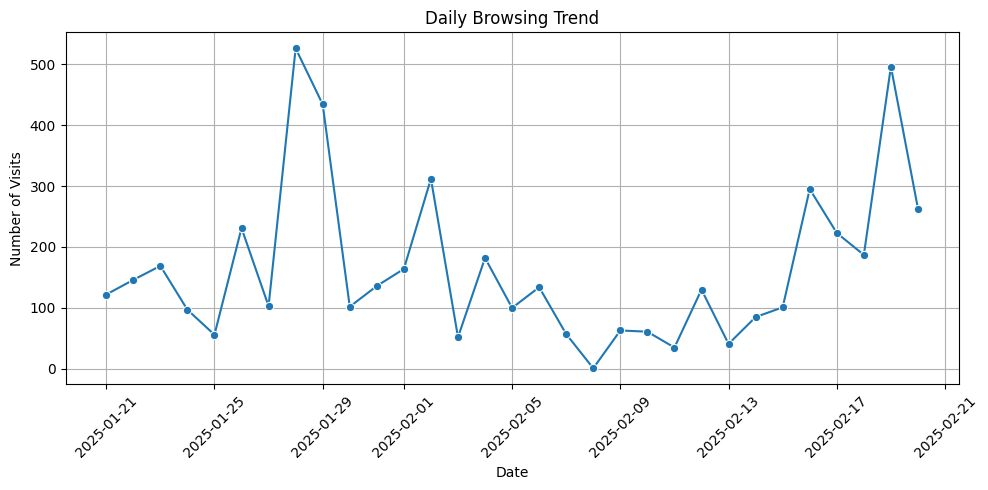

In [58]:
# Visualization 1 : Daily Browsing Trend

daily_visits = df["date"].value_counts().sort_index()

plt.figure(figsize=(10, 5))
sns.lineplot(x=daily_visits.index, y=daily_visits.values, marker='o')
plt.title("Daily Browsing Trend")
plt.xlabel("Date")
plt.ylabel("Number of Visits")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

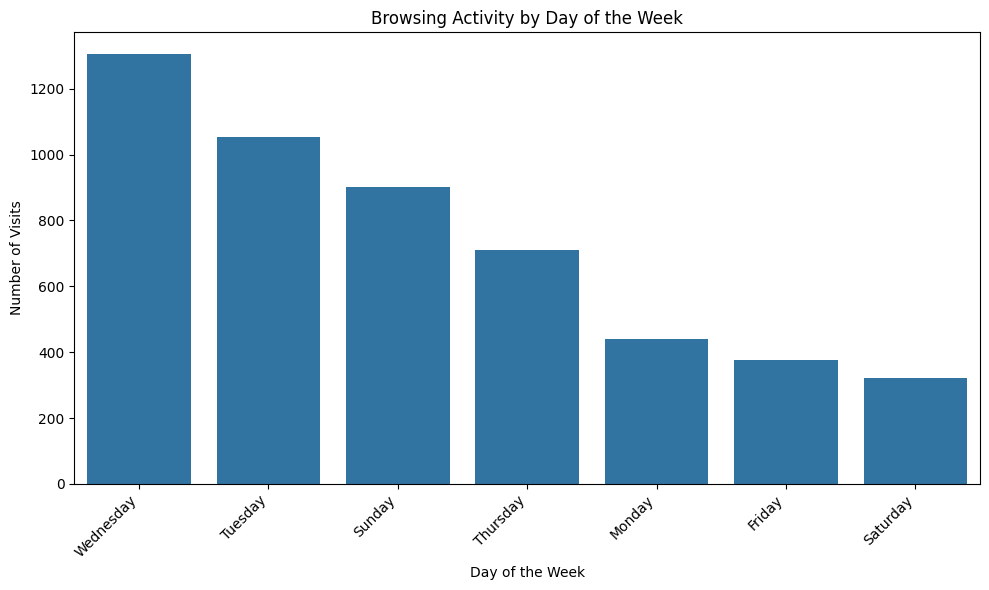

In [59]:
# Visualization 2 : Browsing Activity by Day of the Week

day_counts = df['day_of_week'].value_counts().sort_index(
    key=lambda x: pd.to_datetime(x, format='%A')
)
plt.figure(figsize=(10, 6))
sns.barplot(x=day_counts.index, y=day_counts.values)
plt.xlabel('Day of the Week')
plt.ylabel('Number of Visits')
plt.title('Browsing Activity by Day of the Week')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


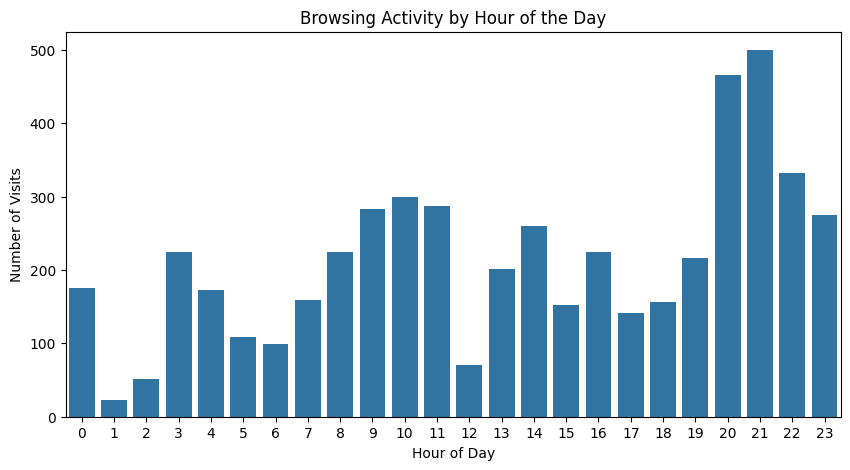

In [60]:
# Visualization 3 : Browsing Activity by Hour of the Day

plt.figure(figsize=(10, 5))
sns.countplot(x="hour", data=df)
plt.title("Browsing Activity by Hour of the Day")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Visits")
plt.show()

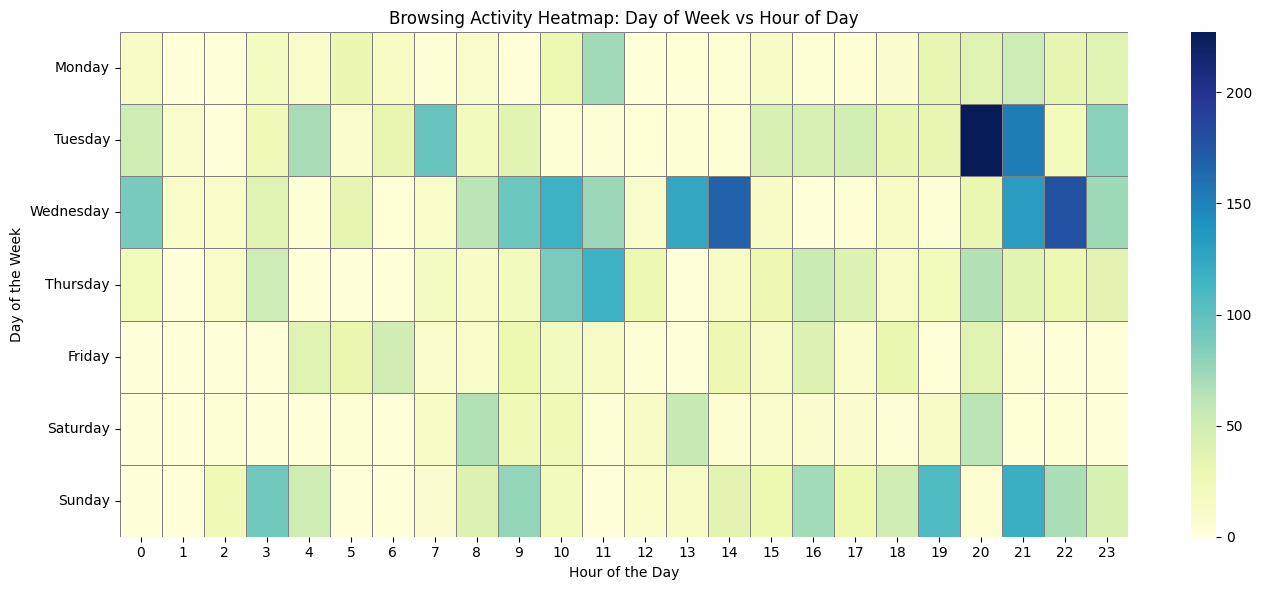

In [61]:
# Visualization 4 : Browsing Activity Heatmap: Day of Week vs Hour of Day

heatmap_data = df.pivot_table(index='day_of_week', columns='hour', values='url', aggfunc='count').fillna(0)
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
heatmap_data = heatmap_data.reindex(day_order)

plt.figure(figsize=(14, 6))
sns.heatmap(heatmap_data, cmap='YlGnBu', linewidths=.5, linecolor='gray')
plt.title('Browsing Activity Heatmap: Day of Week vs Hour of Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Day of the Week')
plt.tight_layout()
plt.show()

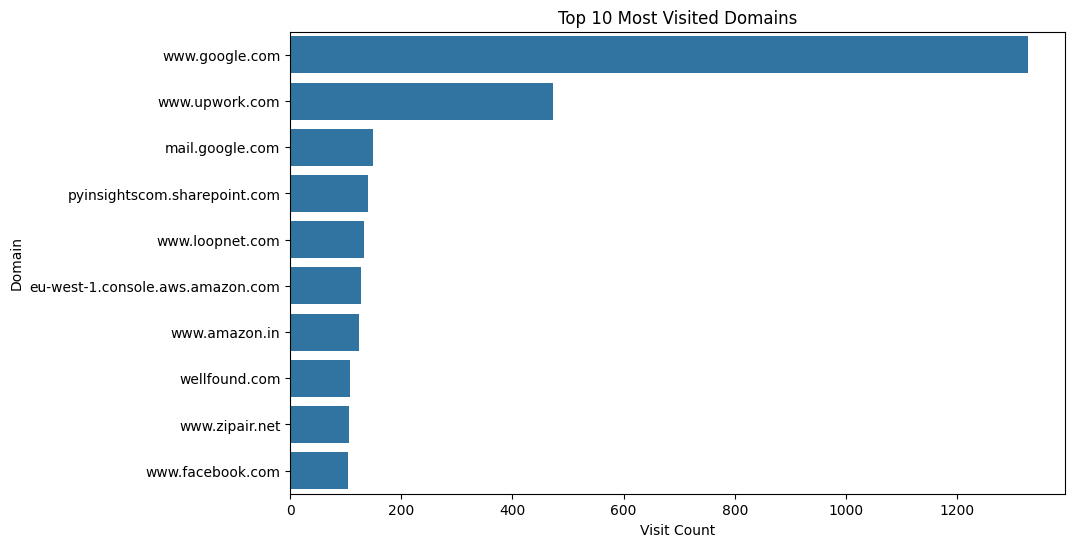

In [62]:
# Visualization 5 : Top 10 Most Visited Domains

df["domain"] = df["url"].apply(lambda x: urlparse(x).netloc)
top_domains = df["domain"].value_counts().nlargest(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_domains.values, y=top_domains.index)
plt.title("Top 10 Most Visited Domains")
plt.xlabel("Visit Count")
plt.ylabel("Domain")
plt.show()

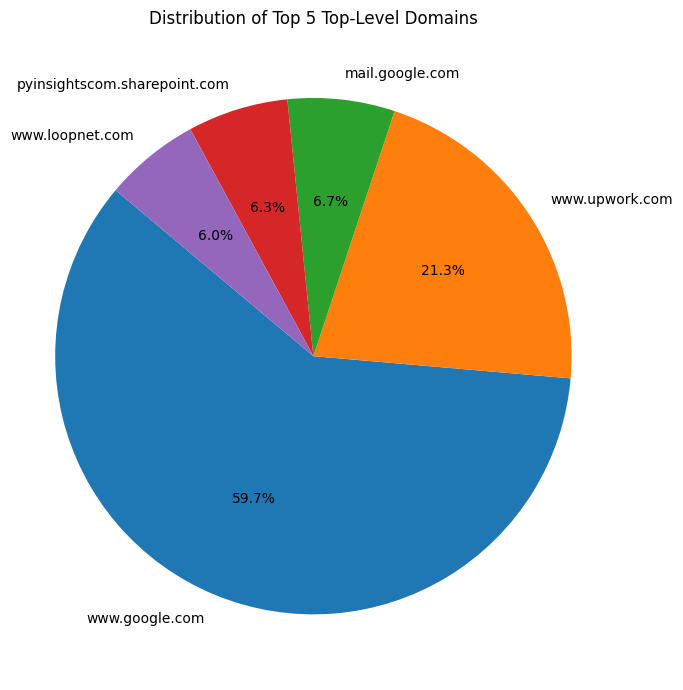

In [63]:
# Visualization 6 : Distribution of Top 5 Domains

top_domains = df["domain"].value_counts().nlargest(5)

plt.figure(figsize=(7, 7))
plt.pie(top_domains, labels=top_domains.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Top 5 Top-Level Domains')
plt.axis('equal')
plt.tight_layout()
plt.show()

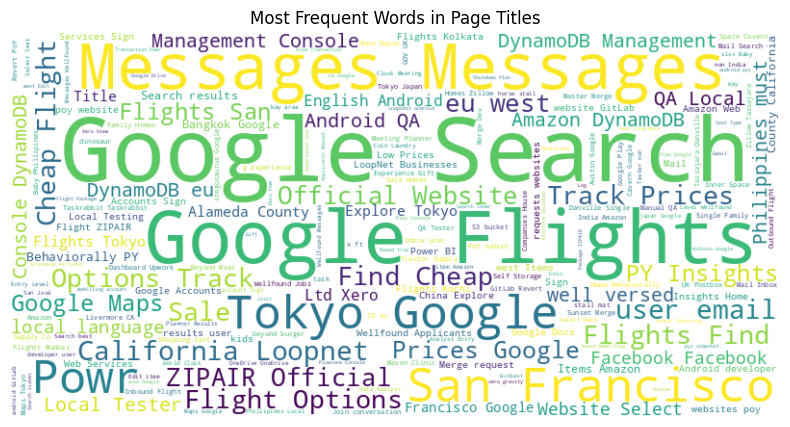

In [64]:
# Visualization 7 : Most Frequent Words in Page Titles

text = df["title"].dropna().str.cat(sep=' ')
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Most Frequent Words in Page Titles")
plt.show()

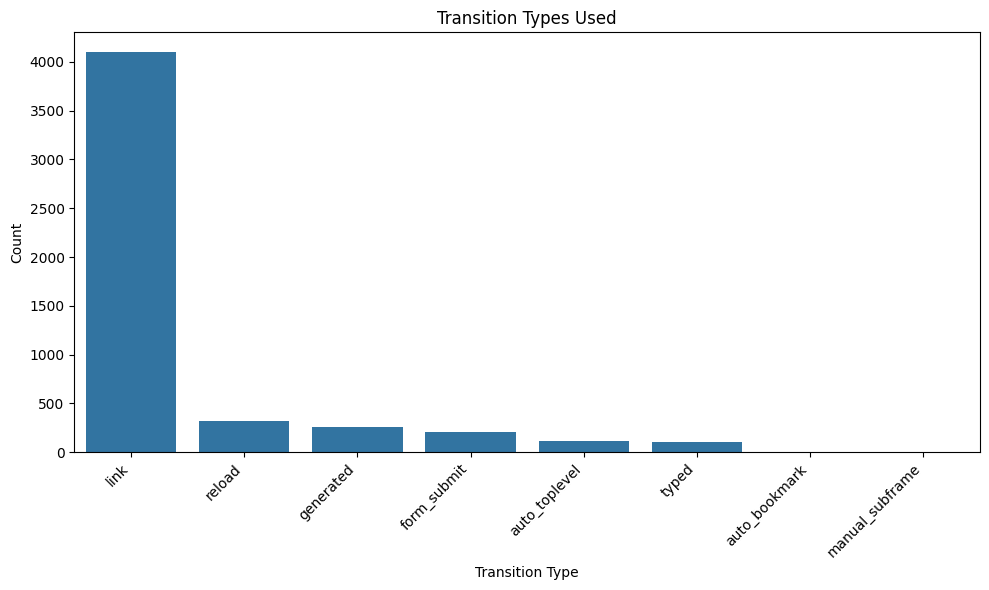

In [65]:
# Visualization 8 : Transition Types Used

transition_counts = df["transition"].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=transition_counts.index, y=transition_counts.values)
plt.title("Transition Types Used")
plt.xlabel("Transition Type")
plt.ylabel("Count")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()